## Today we will work on a realistic binary classification problem: spam email classification

In [19]:
## Loading the dataset (from kaggle)
import pandas as pd
path_to_data = '../datasets/spambase_csv.csv'
df = pd.read_csv(path_to_data)

In [25]:
df.tail(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4591,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.000,0.0,0.0,1.000,1,8,0
4592,0.00,0.0,1.25,0.0,2.50,0.00,0.0,0.0,0.0,0.0,...,0.000,0.111,0.0,0.000,0.0,0.0,1.285,4,27,0
4593,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,1.052,0.0,0.0,1.000,1,6,0
4594,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.630,0.0,0.000,0.0,0.0,1.727,5,19,0
4595,0.00,0.0,1.19,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.000,0.0,0.0,1.000,1,24,0
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [ ]:
## inspecting the dataset
df.head(10)

In [26]:
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [27]:
# create X and y
y = df['class']
X = df[df.columns[:-1]]
X.shape, y.shape

((4601, 57), (4601,))

In [28]:
# train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3680, 57), (921, 57), (3680,), (921,))

In [34]:
# initialize logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)

In [36]:
model.fit(X=X_train, y=y_train)

LogisticRegression(max_iter=10000)

In [37]:
y_test_hat = model.predict(X_test)

In [41]:
import numpy as np
is_correct = ( y_test_hat == y_test ) # check to see if prediction matches ground truth
accuracy = np.mean(is_correct) # count how many correct predictions we found

print(f"Accuracy = {accuracy}")

Accuracy = 0.9413680781758957


In [42]:
np.mean(y)

np.float64(0.39404477287546186)

In [46]:
## How to construct an ROC curve

# we need estimated probabilities on our test set
py_test = model.predict_proba(X_test)
py_test_spam = py_test[:,1]
py_test_spam[:5]

array([0.72596099, 0.32964655, 0.00102015, 0.01745668, 0.46740581])

In [47]:
# my true labels on the test set are y_test

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, py_test_spam)

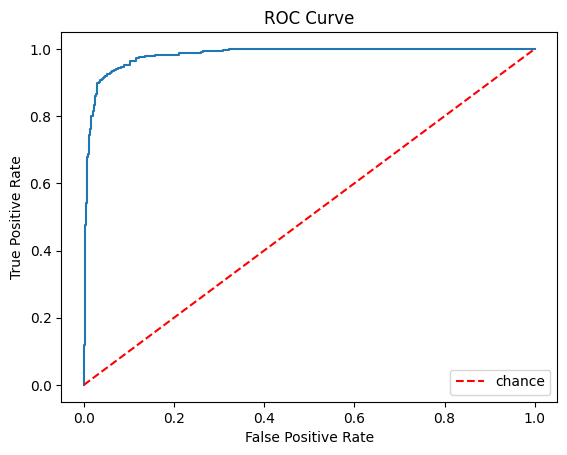

In [55]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], '--r', label='chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [54]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, py_test_spam)

np.float64(0.9824272133095662)